In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [18]:
# Load the data from your HTML file
df = pd.read_html("agmarknet_price_arrival.html")[0]

In [19]:
# Keep only relevant columns and rename them
df = df[['Arrivals (Tonnes)', 'Modal Price (Rs./Quintal)', 'Reported Date']]
df.columns = ['Arrivals', 'Modal_Price', 'Date']

In [20]:
# Convert price from Rs./Quintal to Rs./Kg
df['Price_per_kg'] = df['Modal_Price'] / 100

In [22]:
# Convert 'Reported Date' to datetime format and sort by date
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date')

# Display the cleaned DataFrame head
df[['Date', 'Arrivals', 'Price_per_kg']].head()

,Date,Arrivals,Price_per_kg
116,2024-09-01,5.2,28.0
118,2024-09-02,5.3,28.5
58,2024-09-02,5.2,28.0
55,2024-09-03,5.0,30.0
115,2024-09-03,5.2,30.5


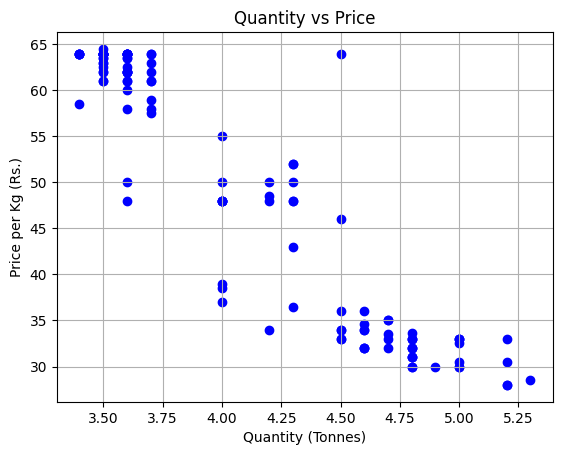

In [23]:
plt.scatter(df['Arrivals'], df['Price_per_kg'], color='blue')
plt.xlabel('Quantity (Tonnes)')
plt.ylabel('Price per Kg (Rs.)')
plt.title('Quantity vs Price')
plt.grid()
plt.show()

In [24]:
# Define independent and dependent variables
X = df['Arrivals']
Y = df['Price_per_kg']

In [25]:
# Add a constant for the intercept term
X = sm.add_constant(X)

In [26]:
model = sm.OLS(Y, X).fit()

In [27]:
# Extract the intercept (A) and slope (B)
A, B = model.params

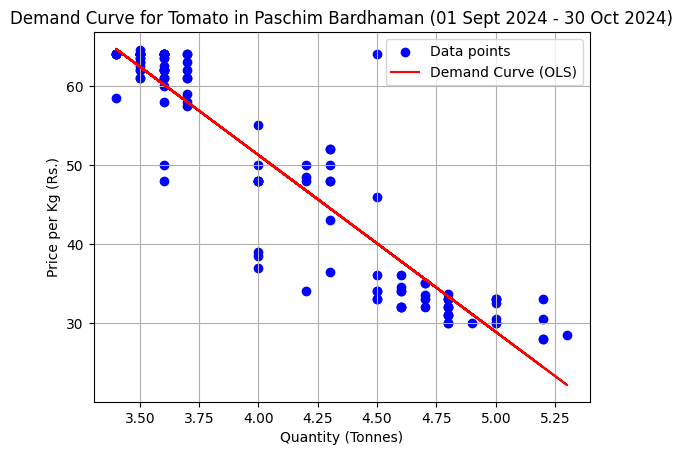

In [31]:
# Plot the demand curve
plt.scatter(df['Arrivals'], df['Price_per_kg'], color='blue', label='Data points')
plt.plot(df['Arrivals'], A + B * df['Arrivals'], color='red', label='Demand Curve (OLS)')
plt.xlabel('Quantity (Tonnes)')
plt.ylabel('Price per Kg (Rs.)')
plt.title('Demand Curve for Tomato in Paschim Bardhaman (01 Sept 2024 - 30 Oct 2024)')
plt.legend()
plt.grid()
plt.savefig('demand_curve_tomato.png', dpi=300)  
plt.show()

In [29]:
print(f'The demand curve equation is: Y = {A:.2f} + {B:.2f} * X')

The demand curve equation is: Y = 140.82 + -22.39 * X


In [32]:
Y_pred = model.predict(X)
SSE = ((Y-Y_pred)**2).sum()
print(f'Sum of Squared Errors (SSE): {SSE:.2f}')

Sum of Squared Errors (SSE): 2863.86
